In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import set_style
set_style("whitegrid")

In [5]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

NotImplementedError: Mounting drive is unsupported in this environment. Use PyDrive instead. See examples at https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2.

In [6]:
!apt-get install -y -qq gcsfuse

E: Unable to locate package gcsfuse


In [7]:
!mkdir -p MyDrive
!google-drive-ocamlfuse MyDrive -o nonempty -o allow_other
!echo "Google Drive mounted to: /content/My Drive"

/bin/bash: line 1: google-drive-ocamlfuse: command not found
Google Drive mounted to: /content/My Drive


In [8]:
import os
files = os.listdir('/content/MyDrive')  # Change path if necessary
#print(files)

In [115]:
#df=pd.read_csv('/content/My Drive/merged_test.csv')
#df = pd.read_csv('/content/MyDrive/merged_train.csv')
df = pd.read_csv('/content/MyDrive/merged_train_alt.csv')


<ipython-input-115-a2bfb8a74cd2>:3: DtypeWarning: Columns (14,16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/MyDrive/merged_train_alt.csv')


In [117]:
len(df)

3000888

In [49]:
#df_test = pd.read_csv('/content/drive/My Drive/Grocery/merged_test.csv')

df_test = pd.read_csv('/content/MyDrive/merged_test.csv')

# Try single entry


In [ ]:
df_cut=df[(df['family']=='GROCERY I') & (df['store_nbr']==1)]

In [ ]:
# Preprocess: set the index:
df_cut['date'] = pd.to_datetime(df_cut['date'])  # Convert date column to datetime format
df_cut.set_index('date', inplace=True)

<ipython-input-10-867428447ab9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['date'] = pd.to_datetime(df_cut['date'])  # Convert date column to datetime format


In [ ]:

# Set the frequency explicitly (e.g., daily)
df_cut = df_cut.asfreq('D')

# Check the frequancy
print(df_cut.index.freq)


<Day>


In [ ]:
df_cut.sales.na

,sales
date,
2013-01-02,2652.0
2013-01-03,2121.0
2013-01-04,2056.0
2013-01-05,2216.0
2013-01-06,723.0
...,...
2017-08-11,1270.0
2017-08-12,1630.0
2017-08-13,952.0


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.4 MB/s eta 0:00:00


In [ ]:
print(df_cut['sales'].isna().sum())  # Check the number of missing values

0


In [ ]:
df_cut['sales'] = df_cut['sales'].fillna(0)  # Fill NaNs with 0

In [ ]:
from pmdarima import auto_arima
auto_arima(df_cut['sales'], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27842.602, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27532.738, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27840.602, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=27440.248, Time=1.68 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=27372.970, Time=0.77 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=27300.332, Time=1.39 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=27243.424, Time=0.62 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=26977.261, Time=4.75 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.11 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.16 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=26976.075, Time=2.24 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=26975.8

ARIMA(order=(5, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

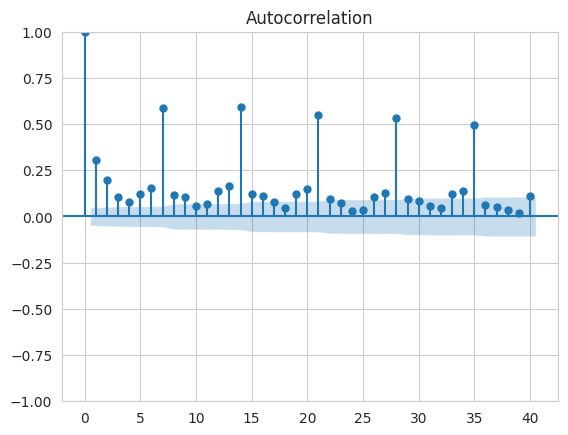

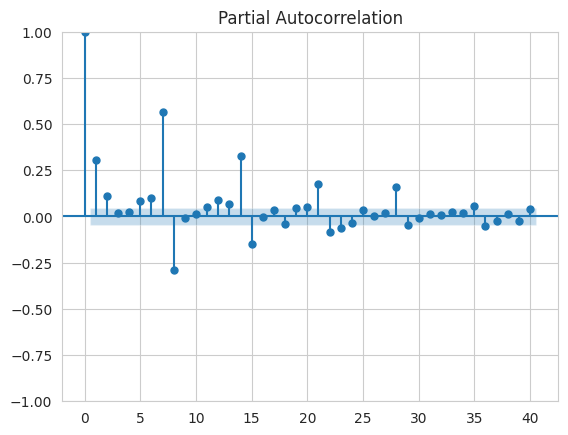

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(df_cut['sales'], lags=40)
plt.show()

plot_pacf(df_cut['sales'], lags=40)
plt.show()

In [ ]:

# Use auto_arima to find the best orders
model = auto_arima(df_cut['sales'],
                   seasonal=True,          # Enable seasonal ARIMA
                   order=(4,1,3),       # Set the order
                   m = 7,                  # Set seasonal order = 7
                   trace=True,             # Print trial models
                   error_action='ignore',  # Ignore errors for non-viable models
                   suppress_warnings=True, # Suppress warnings
                   stepwise=True)          # Use stepwise search to reduce computation time

# Summary of the selected model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=6.91 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=27842.602, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=26645.620, Time=1.54 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=27840.602, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=27532.738, Time=0.10 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=26409.742, Time=4.13 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=12.59 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=8.68 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=26577.508, Time=2.89 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=26324.970, Time=4.75 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=26568.680, Time=5.49 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=19.45 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=10.13 sec
 ARIMA(3,1,0)(2,0,0)[7] intercept   : AIC=26269.054,

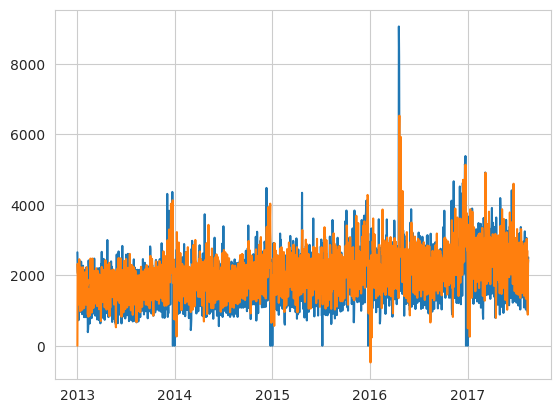

In [ ]:
plt.plot(df_cut.index, df_cut['sales'])
plt.plot(df_cut.index, model.fittedvalues())
#plt.plot(range(len(df_cut),len(df_cut)+len(df_test)), model.forecast(len(df_test)))
plt.show()

In [ ]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c) 2007-2024 The scikit-learn developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse or promote produ

In [ ]:
from sklearn.metrics import mean_squared_log_error



In [ ]:
from sklearn.metrics import root_mean_squared_log_error

In [ ]:
prediction = model.fittedvalues()
prediction[prediction < 0] = 0

In [ ]:
mean_squared_log_error(df_cut['sales'], prediction,squared = False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:675: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [1, 1676]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Try different families:**bold text**

In [ ]:
df_store = df[df['store_nbr'] == 1]
df_store = df_store.fillna(0)

<ipython-input-79-9579eef7e013>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_store = df_store.fillna(0)


In [ ]:
df_store['family_encoded'] = pd.factorize(df_store['family'])[0] + 1  # Adding 1 to make the encoding start from 1
# Check the unique values and the encoding
# print(df_store[['family', 'family_encoded']].drop_duplicates())

In [ ]:
df_store['date'] = pd.to_datetime(df_store['date'])  # Convert date column to datetime format

In [ ]:
# Set the index to be both 'date' and 'family'
df_store.set_index(['date'], inplace=True)

In [ ]:
df_store = df_store.asfreq('D')

ValueError: cannot reindex on an axis with duplicate labels

<Day>


In [ ]:
feature_store = df_store[['onpromotion','month','year','day','day_of_week','oil']]

In [ ]:
# Fit as it is:

model = auto_arima(df_store['sales'],
                   seasonal = True,
                   m = 7,
                   trace = True
                   stepwise = True,
                   error_action = 'ignore')

df_store['family_encoded'] = df_store['family'].astype('category').cat.codes
# Define `endog` and `exog`
endog = df_store['sales']
exog = df_store[['onpromotion', 'oil_price', 'store_encoded', 'family_encoded']]

# Fit SARIMAX
sarima_model = SARIMAX(endog,
                       exog=exog,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 7)  # Assuming weekly seasonality
                      ).fit()


In [ ]:

# Loop through each family and apply auto_arima
# Then do the SARIMAX fitting
best_models = {}
prediction_family = {}
for family in df_store.family.unique():
    # Filter data for the current family
    df_family = df_store[df_store.family == family]
    feature_store = df_family[['onpromotion','month','year','day','day_of_week','oil']]
    '''
    # Apply auto_arima to find the best model for this family
    model = auto_arima(df_family['sales'],
                       seasonal=True,     # Seasonal model (for yearly seasonality)
                       m = 7,
                       trace=True,        # Show search progress
                       stepwise=True,     # Use stepwise approach to reduce search space
                       error_action='ignore',  # Ignore errors for non-viable models
                       suppress_warnings=True)  # Suppress warnings

    # Store the model for later use
    best_models[family] = model
    '''
    model_x = SARIMAX(df_family['sales'].astype(float),
                      #order = model.order,
                      m = 7,
                      exog=feature_store,
                      #start_p=1, start_q=1,
                      #test='adf',
                      #max_p=3, max_q=3, m=7,
                      #start_P=0, seasonal=True,
                      #d=None, D=1,
                      trace=False
                    )
    sarima_model_family = model_x.fit()
    prediction_family[family] = sarima_model_family.fittedvalues

    print(sarima_model_family.summary())


NameError: name 'df_store' is not defined

In [ ]:
df_family = df_store[df_store.family == 'GROCERY I']

In [ ]:
prediction_store =  prediction_family['GROCERY I']


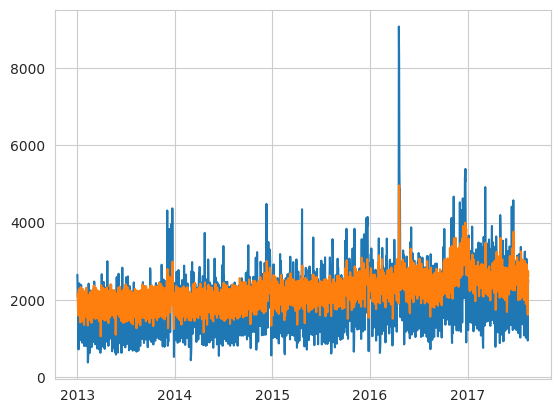

In [ ]:
plt.plot(df_family.index.get_level_values('date'), df_family['sales'])
plt.plot(df_family.index.get_level_values('date'), prediction_store)
#plt.plot(range(len(df_cut),len(df_cut)+len(df_test)), model.forecast(len(df_test)))
plt.show()

In [ ]:
# Generate model predictions (assuming you have your model and test data)
predictions = prediction_store  # Replace with your actual prediction call

# Replace negative predictions with 0
predictions[predictions < 0] = 0

# Calcualte the RMSLE
mean_squared_log_error(df_family['sales'], predictions, squared= False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:675: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


0.31524943791629945

# Try this for all the data:



In [57]:
# df=pd.read_csv('/content/drive/My Drive/Grocery/merged_train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Grocery/merged_train.csv'

In [118]:
df= df.fillna(0)


In [119]:
df_test['sales'] = 0

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [120]:
df['date'] = pd.to_datetime(df['date'])
# Set the index to be both 'date' and 'family'
df.set_index(['date'], inplace=True)


In [ ]:
# label the unique holidays

In [77]:
#df.columns

Index(['year', 'month', 'week_number', 'day', 'day_of_week', 'store_nbr',
       'type', 'cluster', 'city', 'state', 'transactions', 'oil', 'hol_Nat',
       'hol_Nat_name', 'hol_Reg', 'hol_Reg_name', 'hol_Loc', 'hol_loc_name',
       'event', 'hol_event_name', 'transferred', 'hol_type_Additional',
       'hol_type_Bridge', 'hol_type_Event', 'hol_type_Holiday',
       'hol_type_Transfer', 'hol_type_Work Day', 'family', 'onpromotion',
       'sales'],
      dtype='object')

In [121]:
#hol_nat_name = df.hol_Nat_name.unique()
df['hol_Nat_number'] = df['hol_Nat_name'].astype('category').cat.codes
df['hol_Reg_number'] = df['hol_Reg_name'].astype('category').cat.codes
df['hol_loc_number'] = df['hol_loc_name'].astype('category').cat.codes

In [122]:
df_test['hol_Nat_number'] = df_test['hol_Nat_name'].astype('category').cat.codes
df_test['hol_Reg_number'] = df_test['hol_Reg_name'].astype('category').cat.codes
df_test['hol_loc_number'] = df_test['hol_loc_name'].astype('category').cat.codes

In [ ]:
# Igore:

In [ ]:
#df_store = df[df.store_nbr == 1]

In [ ]:
#sales_family = df_store.groupby('date')['sales'].apply(list).reset_index()

In [ ]:
# df_store = pd.merge(df_store, sales_family, on = 'date', how = 'left')

In [ ]:
#sales_family['date'] = pd.to_datetime(sales_family['date'])
#sales_family.set_index(['date'], inplace = True)

In [64]:
pip install pmdarima

In [65]:
from pmdarima import auto_arima

In [ ]:
# This doesn't work, igore


'''
model = auto_arima(sales_family['sales'],
                   seasonal=True,     # Seasonal model (for yearly seasonality)
                   m = 7,
                   trace=True,        # Show search progress
                   stepwise=True,     # Use stepwise approach to reduce search space
                   error_action='ignore',  # Ignore errors for non-viable models
                   suppress_warnings=True)  # Suppress warnings
                   '''

"\nmodel = auto_arima(sales_family['sales'],\n                   seasonal=True,     # Seasonal model (for yearly seasonality)\n                   m = 7,\n                   trace=True,        # Show search progress\n                   stepwise=True,     # Use stepwise approach to reduce search space\n                   error_action='ignore',  # Ignore errors for non-viable models\n                   suppress_warnings=True)  # Suppress warnings\n                   "

In [159]:

# Loop through each family and apply auto_arima
# Then do the SARIMAX fitting

#for family in df.family.unique():
for family in [df.family.unique()[0]]:
  # for storeID in df.store_nbr.unique():
  for storeID in [df.store_nbr.unique()[0]]:
      # Filter data for the current family
      df_family = df[(df.family == family) & (df.store_nbr == storeID)]
      df_family = df_family.asfreq('D').fillna(0)  #This can create na values.
      #feature_store = df_family[['onpromotion','month','year','day','day_of_week','oil']]
      # try adding more feature

      #feature_store = df_family[['onpromotion','month','year','day','day_of_week','oil',
      #                           'hol_Nat_number','hol_Reg_number','hol_loc_number']]
      feature_store = df_family[['onpromotion','month','year','day','day_of_week','oil',
                                 'hol_Nat_number']]

      # feature_store = feature_store.fillna(0)


      df_test_family = df_test[(df_test.family == family) & (df_test.store_nbr == storeID)]

      #feature_test = df_test_family[['onpromotion','month','year','day','day_of_week','oil']]
      #feature_test = df_test_family[['onpromotion','month','year','day','day_of_week','oil',
      #                              'hol_Nat_number','hol_Reg_number','hol_loc_number']]
      feature_test = df_test_family[['onpromotion','month','year','day','day_of_week','oil',
                                     'hol_Nat_number']]


      # Apply auto_arima to find the best model for this family
      model = auto_arima(df_family['sales'],
                         seasonal=True,     # Seasonal model (for yearly seasonality)
                        m = 7,
                        trace=True,        # Show search progress
                        stepwise=True,     # Use stepwise approach to reduce search space
                        error_action='ignore',  # Ignore errors for non-viable models
                        suppress_warnings=True)  # Suppress warnings

      # Check the order
      print(model.order)
      print(model.seasonal_order)


      model_x = SARIMAX(df_family['sales'].astype(float),
                        order = model.order,
                        #order = (5,2,3),
                        #order=(1, 1, 0),
                        seasonal_order=model.seasonal_order,  # Weekly seasonality (7 days)
                        #seasonal_order = [1,1,1,7],
                        exog=feature_store
                        #maxiter=200,
                        #method = 'powell'

                        #start_p=1, start_q=1,
                        #test='adf',
                        #max_p=3, max_q=3, m=7,
                        #start_P=0, seasonal=True,
                        #d=None, D=1,
                      )

      #sarima_model_family = model_x.fit()
      sarima_model_family = model_x.fit(disp=True, maxiter = 100)

      prediction= sarima_model_family.forecast(steps= 16, exog=feature_test)

      fitvalue = sarima_model_family.fittedvalues

      # Check the model:
      result = sarima_model_family
      coeff_table = pd.DataFrame({
          "Coefficient": result.params,
          "Std Error": result.bse,
          "P>|z|": result.pvalues,
          "Conf Interval (Lower)": result.conf_int().iloc[:, 0],
          "Conf Interval (Upper)": result.conf_int().iloc[:, 1]
          })
      print(sarima_model_family.summary())
      break


      # coeff_table.to_csv('/content/MyDrive/model_new/model' + str(index) + '.csv')

      # Update the sales in df_test for the current family and store
      # df_test.loc[(df_test.family == family) & (df_test.store_nbr == storeID), 'sales'] = prediction.values






Performing stepwise search to minimize aic
 ARIMA(3,1,3)(1,0,1)[7] intercept   : AIC=inf, Time=3.90 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=9208.074, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=8774.542, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=8069.045, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=9206.074, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=8075.798, Time=0.20 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=4.93 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=8049.997, Time=2.44 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=4.79 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=9177.989, Time=0.49 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=8051.835, Time=1.97 sec
 ARIMA(0,1,2)(0,0,2)[7] intercept   : AIC=8051.819, Time=2.89 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=8754.570, Time=0.58 sec
 ARIMA(1,1,2)(0,0,2)[7] intercept   : AIC=8049.360, Time=4.63 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=8070.4

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                 1688
Model:             SARIMAX(1, 1, 2)x(0, 0, 2, 7)   Log Likelihood               -4017.749
Date:                           Thu, 28 Nov 2024   AIC                           8047.498
Time:                                   04:49:55   BIC                           8080.083
Sample:                               01-01-2013   HQIC                          8059.566
                                    - 08-15-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9817      0.010    -98.195      0.000      -1.001      -0.962
ma.L1          0.0081      0.007      1.145

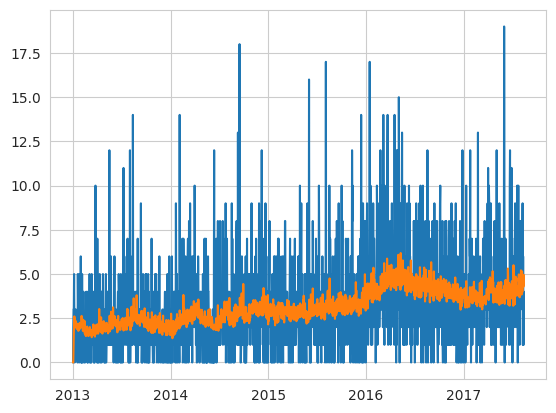

In [160]:
plt.plot(df_family.index, df_family['sales'])
plt.plot(df_family.index, fitvalue)

In [161]:
from sklearn.metrics import root_mean_squared_log_error
for i,value in enumerate(fitvalue):
  if value<0:
    fitvalue[i] = 0
root_mean_squared_log_error(df_family['sales'], fitvalue)

0.6594796249908027

In [157]:
import joblib
joblib.cpu_count()

8

## Try parallel:

In [107]:
#df = df[df.year > 2015]

In [162]:
from joblib import Parallel, delayed
from tqdm import tqdm
import logging

# Define a function for processing a single family-store combination
def process_arimax(family, storeID, df_train, df_test, index):
    try:

        # fillna
        df_train = df_train.asfreq('D').fillna(0)  # This can create NA values. Fill with zero
        # feature_store = df_train[['onpromotion', 'month', 'year', 'day', 'day_of_week', 'oil']]
        # feature_store = df_train[['onpromotion','month','year','day','day_of_week','oil',
        #                         'hol_Nat_number','hol_Reg_number','hol_loc_number']]
        feature_store = df_train[['onpromotion','month','year','day','day_of_week',
                                 'hol_Nat_number']]


        # Take that for the test
        # feature_test = df_test[['onpromotion', 'month', 'year', 'day', 'day_of_week', 'oil']]
        #feature_test = df_test[['onpromotion','month','year','day','day_of_week','oil',
        #                             'hol_Nat_number','hol_Reg_number','hol_loc_number']]
        feature_test = df_test[['onpromotion','month','year','day','day_of_week',
                                     'hol_Nat_number']]

        # Apply auto_arima to find the best model for this family
        model = auto_arima(
            df_train['sales'],
            seasonal=True,
            m=7,
            trace=False,
            stepwise=True,
            error_action='ignore',
            suppress_warnings=True,
            disp = False
        )

        # Fit SARIMAX
        model_x = SARIMAX(
            df_train['sales'].astype(float),
            order=model.order,
            seasonal_order=model.seasonal_order,
            exog=feature_store
        )
        sarima_model = model_x.fit(disp=False, maxiter=50)

        # Forecast
        prediction = sarima_model.forecast(steps=16, exog=feature_test)

        df_test['sales'] = prediction.values
        # Save the file to be safe:

        df_test['sales'].to_csv('/content/MyDrive/output_new/prediction_' + str(index) + '.csv')

        fitvalue = sarima_model.fittedvalues

        # Check the model:
        result = sarima_model
        coeff_table = pd.DataFrame({
            "Coefficient": result.params,
            "Std Error": result.bse,
            "P>|z|": result.pvalues,
            "Conf Interval (Lower)": result.conf_int().iloc[:, 0],
            "Conf Interval (Upper)": result.conf_int().iloc[:, 1]
            })
        coeff_table.to_csv('/content/MyDrive/model_new/model' + str(index) + '.csv')

        return family, storeID, prediction, fitvalue
    except Exception as e:
        #Log the error message as a string
        logging.error(str(f"Error processing index {index}: Family={family}, Store={storeID} -> {e}"))

# Prepare combinations
combinations = [(family, storeID) for family in df.family.unique() for storeID in df.store_nbr.unique()]
total_combinations = len(combinations)

# Use Parallel to execute the processing function concurrently
result = Parallel(n_jobs=-1)(
    delayed(process_arimax)(family, storeID, df[(df['family'] == family) & (df['store_nbr'] == storeID)],
                  df_test[(df_test['family'] == family)&(df_test['store_nbr'] == storeID)],i+1)
    for  i,(family, storeID) in tqdm(enumerate(combinations))
)

23it [01:05,  1.75s/it]/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
1782it [7:27:28, 15.07s/it]


## Save the data

In [166]:
df_train = pd.read_csv('/content/MyDrive/merged_train_alt.csv')

<ipython-input-166-3c0b5d2f32e7>:1: DtypeWarning: Columns (14,16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('/content/MyDrive/merged_train_alt.csv')


In [167]:
df_train['fitvalue'] = 0

1688

In [172]:
for item in result:
    # Skip if the item is None
    if item is None:
        continue

    family, storeID, prediction, fitvalue = item

    # Assign values to the respective DataFrames
    df_test.loc[(df_test.family == family) & (df_test.store_nbr == storeID), 'sales'] = prediction.values
    df_train.loc[(df_train.family == family) & (df_train.store_nbr == storeID), 'fitvalue'] = fitvalue.values[4:]
    #print(storeID)

# Save the 'sales' column to a CSV file
# df_test['sales'].to_csv('/content/MyDrive/prediction_neew.csv')


<ipython-input-172-e61033099049>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.36630924 2.50560985 3.47442601 ... 4.10322337 5.15172456 5.06648565]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[(df_train.family == family) & (df_train.store_nbr == storeID), 'fitvalue'] = fitvalue.values[4:]


In [173]:
df_train[['date','family','store_nbr','sales','fitvalue',]].to_csv('/content/MyDrive/fitvalue_hol.csv')

In [174]:
df_test_ori = pd.read_csv('/content/MyDrive/test.csv',header = 0)
df_test_ori['sales'] = 0
#for family in df.family.unique():
#    for storeID in df.store_nbr.unique():
#        df_test_ori.loc[(df_test_ori.family == family)& (df_test_ori.store_nbr == storeID), 'sales'] = df_pred[(df_pred.family == family)& (df_pred.store_nbr == storeID)]['sales']

df_test_ori['sales'] = df_test['sales']
df_test_ori.to_csv('/content/MyDrive/submission_check_new.csv',index = False)

df_test_ori[['id','sales']].to_csv('/content/MyDrive/submission_new.csv',index = False)

In [175]:
# Post analysis:

df_train['date']= pd.to_datetime(df_train['date'])
last_month = df_train['date'].max() - pd.DateOffset(months=1)
# Step 1: Identify store-family combinations with no sales in the last month
no_sales_combinations = df_train.loc[df_train['date'] >= last_month].groupby(['store_nbr', 'family'])['sales'].sum()
no_sales_combinations = no_sales_combinations[no_sales_combinations == 0].reset_index()[['store_nbr', 'family']]
# Step 2: Set sales to 0 in df_test for the identified combinations
for _, row in no_sales_combinations.iterrows():
    store_nbr = row['store_nbr']
    family = row['family']
    #df_test_sales.loc[(df_test_sales[‘store_nbr’] == store_nbr) & (df_test_sales[‘family’] == family), ‘sales’] = 0
    df_test_ori.loc[(df_test_ori['store_nbr'] == store_nbr) & (df_test_ori['family'] == family), 'sales'] = 0

df_test_ori['sales'] = df_test_ori['sales'].clip(lower=0)
df_test_ori[['id','sales']].to_csv('/content/MyDrive/submission_new_post.csv',index = False)

In [268]:
# Take a look of the model output


<ipython-input-178-035bca4ff4aa>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Feature", y="P-Value", data=df_plot, scale="width", palette="muted")
<ipython-input-178-035bca4ff4aa>:46: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="Feature", y="P-Value", data=df_plot, scale="width", palette="muted")


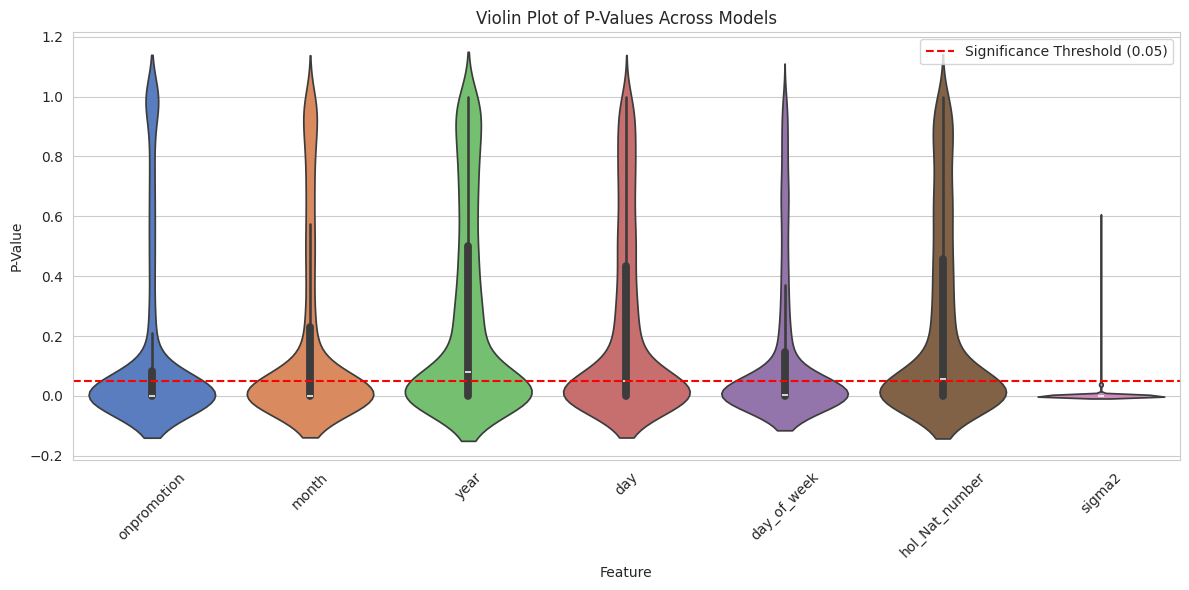

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a dictionary to store p-values for each feature
p_values = {
    "onpromotion": [],
    "month": [],
    "year": [],
    "day": [],
    "day_of_week": [],
    "oil": [],
    "hol_Nat_number": [],
    "hol_Reg_number": [],
    "hol_loc_number": [],
    "ar_L1": [],
    "ma_L1": [],
    "ar_S_L7": [],
    "sigma2": []
}

# Loop through all 1782 files and collect p-values
for index in range(1, 1783):  # Adjusting range to include all files
    file_path = f'/content/MyDrive/model_new/model{index}.csv'
    try:
      df_model = pd.read_csv(file_path)
    except FileNotFoundError:
      print(index)
      continue

    for feature in p_values.keys():
        # Append the p-value for the current feature, if it exists
        p_value = df_model[df_model['Unnamed: 0'] == feature]['P>|z|'].values
        if len(p_value) > 0:  # Check if p-value is available
            p_values[feature].append(p_value[0])

# Convert the dictionary into a long-format DataFrame for Seaborn
data = []
for feature, values in p_values.items():
    data.extend([(feature, p) for p in values])

df_plot = pd.DataFrame(data, columns=["Feature", "P-Value"])

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Feature", y="P-Value", data=df_plot, scale="width", palette="muted")
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title("Violin Plot of P-Values Across Models")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [124]:
# CHekc why certain family store combination is empty:
for family in df.family.unique():
   for storeID in df.store_nbr.unique():
      #Filter data for the current family
      df_family = df[(df.family == family) & (df.store_nbr == storeID)]
      #print(len(df_family))


KeyboardInterrupt: 

In [ ]:
# Following is just a a test

## test

In [ ]:

from joblib import Parallel, delayed
from tqdm import tqdm
import time

# Configure logging
# ogging.basicConfig(level=logging.INFO, format='%(processName)s: %(message)s')

def test(family, storeID, df_train, df_test, index):

  # time.sleep(0.1)
  if index % 10 == 0:
    df_test.to_csv('/content/drive/My Drive/Grocery/sarimaX_save/test_' + str(index) + '.csv')
  return storeID, family, df_test['sales']

# Prepare combinations
combinations = [(family, storeID) for family in df.family.unique() for storeID in df.store_nbr.unique()]
# Run in parallel
result = Parallel(n_jobs=2)(
    delayed(test)(family, storeID, df[(df['family'] == family)&(df['store_nbr'] == storeID)],
                  df_test[(df_test['family'] == family)&(df_test['store_nbr'] == storeID)],i+1)
    for  i,(family, storeID) in tqdm(enumerate(combinations))
)

array([25.,  0.,  0., ...,  0.,  0.,  0.])

In [ ]:
# prediction.values

In [99]:
print(sarima_model_family.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               sales   No. Observations:                 1688
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 7)   Log Likelihood              -10879.787
Date:                             Wed, 27 Nov 2024   AIC                          21787.573
Time:                                     03:03:09   BIC                          21863.611
Sample:                                 01-01-2013   HQIC                         21815.733
                                      - 08-15-2017                                         
Covariance Type:                               opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
onpromotion        1.7801      0.982      1.813      0.070      -0.145       3.705
month          

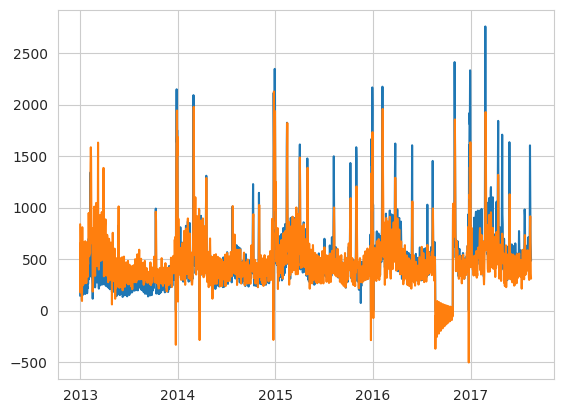

In [98]:
plt.plot(df_family.index,  df_family.sales)
plt.plot(df_family.index, sarima_model_family.fittedvalues)

In [104]:
pip show scikit-learn


Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c) 2007-2024 The scikit-learn developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse or promote produ

In [105]:
from sklearn.metrics import root_mean_squared_log_error

In [106]:
predictions = sarima_model_family.fittedvalues
predictions[predictions < 0] = 0
root_mean_squared_log_error(df_family['sales'], predictions)

0.53856852095298

In [ ]:
sarima_model_family.summary()

In [ ]:
submission = df_test['sales']


In [ ]:
# Output the submission:
submission.to_csv('submission.csv')
